 Group 3

Harrshit Limbodia	2019B4A40815H

Ninaad Pinakin Thakkar 	2019B4A40872H

Gautam Gupta	2019B2A41118H

Karan Moza	2019B4A71372H

Khushi Khanna 	2019B4A10850H

Aryaa Bharani	2019B1A11556H

Arnav Bhatara	2019B4AA1304H

Sankalp Bhadoria	2019B3AA1269H

Abhimanyu Singh Rana	2019B3A80701H

Event: 8th November 2016 Demonetization


In [ ]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
bheldf = yf.download('BHEL.NS', 
                      start='2015-12-16', 
                      end='2017-01-04', 
                      progress=False
)
bheldf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,112.000000,113.466667,111.599998,112.133331,101.935165,3148881
2015-12-17,113.333336,113.333336,110.266663,112.699997,102.450287,3409300
2015-12-18,112.133331,112.266663,110.266663,111.000000,100.904907,5545135
2015-12-21,111.000000,112.333336,110.766663,111.400002,101.268539,2318526
2015-12-22,111.933334,112.500000,110.300003,110.633331,100.571587,3424249


In [ ]:
nifty_df = yf.download('^NSEI',start='2015-12-16', 
                      end='2017-01-04', 
                      progress=False
)
nifty_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,7725.250000,7776.600098,7715.750000,7750.899902,7750.899902,154300
2015-12-17,7783.049805,7852.899902,7737.549805,7844.350098,7844.350098,175900
2015-12-18,7828.899902,7836.149902,7753.350098,7761.950195,7761.950195,191400
2015-12-21,7745.649902,7840.750000,7733.450195,7834.450195,7834.450195,126300
2015-12-22,7829.399902,7846.299805,7776.850098,7786.100098,7786.100098,125700


In [ ]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY']) 

Date
2015-12-16         NaN
2015-12-17    0.011985
2015-12-18   -0.010560
2015-12-21    0.009297
2015-12-22   -0.006191
                ...   
2016-12-28    0.000249
2016-12-29    0.008520
2016-12-30    0.010093
2017-01-02   -0.000770
2017-01-03    0.001558
Name: Return_NIFTY, Length: 257, dtype: float64


In [ ]:
#removing one enties from NIFTY 50 data
nifty_df.dropna(inplace=True)

In [ ]:
bheldf['Return_BHEL'] = np.log(bheldf['Adj Close']/bheldf['Adj Close'].shift(1))
print(bheldf['Return_BHEL']) 

Date
2015-12-16         NaN
2015-12-17    0.005041
2015-12-18   -0.015199
2015-12-21    0.003597
2015-12-22   -0.006906
                ...   
2016-12-28    0.000838
2016-12-29   -0.005040
2016-12-30    0.020422
2017-01-02    0.010669
2017-01-03    0.018602
Name: Return_BHEL, Length: 259, dtype: float64


In [ ]:
#removing one enties from company data
bheldf.dropna(inplace=True)

In [ ]:
bheldf

,Open,High,Low,Close,Adj Close,Volume,Return_BHEL
Date,,,,,,,
2015-12-17,113.333336,113.333336,110.266663,112.699997,102.450287,3409300,0.005041
2015-12-18,112.133331,112.266663,110.266663,111.000000,100.904907,5545135,-0.015199
2015-12-21,111.000000,112.333336,110.766663,111.400002,101.268539,2318526,0.003597
2015-12-22,111.933334,112.500000,110.300003,110.633331,100.571587,3424249,-0.006906
2015-12-23,111.300003,115.199997,111.199997,114.733330,104.298698,7452429,0.036389
...,...,...,...,...,...,...,...
2016-12-28,79.933334,80.800003,79.400002,79.566666,72.527016,3709056,0.000838
2016-12-29,79.366669,80.266663,78.933334,79.166664,72.162415,7271137,-0.005040
2016-12-30,79.666664,81.066666,79.333336,80.800003,73.651237,7527727,0.020422


In [ ]:
bhelreturns = bheldf['Return_BHEL']
bhelreturns.head()


Date
2015-12-17    0.005041
2015-12-18   -0.015199
2015-12-21    0.003597
2015-12-22   -0.006906
2015-12-23    0.036389
Name: Return_BHEL, dtype: float64

In [ ]:
niftyreturns = nifty_df['Return_NIFTY']
niftyreturns.head()

Date
2015-12-17    0.011985
2015-12-18   -0.010560
2015-12-21    0.009297
2015-12-22   -0.006191
2015-12-23    0.010203
Name: Return_NIFTY, dtype: float64

In [ ]:
#Combining the NIFTY 50 and Company returns 
returns = pd.merge(niftyreturns,bhelreturns,how='inner',on='Date')
returns.head()

,Return_NIFTY,Return_BHEL
Date,,
2015-12-17,0.011985,0.005041
2015-12-18,-0.010560,-0.015199
2015-12-21,0.009297,0.003597
2015-12-22,-0.006191,-0.006906
2015-12-23,0.010203,0.036389


In [ ]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2015-12-17 to 2017-01-03
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  256 non-null    float64
 1   Return_BHEL   256 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


In [ ]:
nifty_df.shape

(256, 7)

In [ ]:
nifty_df

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2015-12-17,7783.049805,7852.899902,7737.549805,7844.350098,7844.350098,175900,0.011985
2015-12-18,7828.899902,7836.149902,7753.350098,7761.950195,7761.950195,191400,-0.010560
2015-12-21,7745.649902,7840.750000,7733.450195,7834.450195,7834.450195,126300,0.009297
2015-12-22,7829.399902,7846.299805,7776.850098,7786.100098,7786.100098,125700,-0.006191
2015-12-23,7830.450195,7871.450195,7826.100098,7865.950195,7865.950195,117900,0.010203
...,...,...,...,...,...,...,...
2016-12-28,8047.549805,8100.549805,8028.399902,8034.850098,8034.850098,126700,0.000249
2016-12-29,8030.600098,8111.100098,8020.799805,8103.600098,8103.600098,178500,0.008520
2016-12-30,8119.649902,8197.000000,8114.750000,8185.799805,8185.799805,127600,0.010093


In [ ]:
returns.shape

(256, 2)

Regression by Market Model

In [ ]:
x = returns['Return_NIFTY']
y = returns['Return_BHEL']
x_sm = sm.add_constant(x)

In [ ]:
#Regression - Market model 
marketmodel = sm.OLS(y,x_sm)

In [ ]:
resultsmm = marketmodel.fit()

In [ ]:
resultsmm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_BHEL   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     102.2
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           2.07e-20
Time:                        20:20:04   Log-Likelihood:                 612.27
No. Observations:                 256   AIC:                            -1221.
Df Residuals:                     254   BIC:                            -1213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0016      0.001     -1.135      0.258      -0.004       0.001
Return_NIFTY     1.4855      0.147     10.109      0.000       1.196       1.775
==============================================================================
Omnibus:                       69.932   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1922.062
Skew:                           0.264   Prob(JB):                         0.00
Kurtosis:                      16.413   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
betabhelmm=resultsmm.params[1]

In [ ]:
resultsmm.f_pvalue

2.0678025413423136e-20

In [ ]:
returnsbhel=returns

In [ ]:
returnsbhel['ER_MM']=returnsbhel['Return_NIFTY']*betabhelmm

In [ ]:
returnsbhel

,Return_NIFTY,Return_BHEL,ER_MM
Date,,,
2015-12-17,0.011985,0.005041,0.017803
2015-12-18,-0.010560,-0.015199,-0.015686
2015-12-21,0.009297,0.003597,0.013811
2015-12-22,-0.006191,-0.006906,-0.009196
2015-12-23,0.010203,0.036389,0.015157
...,...,...,...
2016-12-28,0.000249,0.000838,0.000370
2016-12-29,0.008520,-0.005040,0.012656
2016-12-30,0.010093,0.020422,0.014992


Using CAPM

In [ ]:
rfr=0.02/100

In [ ]:
returnsbhel['Rm-Rf']=returnsbhel['Return_NIFTY']-rfr

In [ ]:
x = returns['Rm-Rf']
y = returns['Return_BHEL']
x_sm = sm.add_constant(x)

In [ ]:
capmmodel = sm.OLS(y,x_sm)

In [ ]:
resultscapm = capmmodel.fit()

In [ ]:
resultscapm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_BHEL   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     102.2
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           2.07e-20
Time:                        20:20:05   Log-Likelihood:                 612.27
No. Observations:                 256   AIC:                            -1221.
Df Residuals:                     254   BIC:                            -1213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.001     -0.921      0.358      -0.004       0.001
Rm-Rf          1.4855      0.147     10.109      0.000       1.196       1.775
==============================================================================
Omnibus:                       69.932   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1922.062
Skew:                           0.264   Prob(JB):                         0.00
Kurtosis:                      16.413   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
returnsbhel['ER_CAPM']=rfr+resultscapm.params[1]*returnsbhel['Rm-Rf']

In [ ]:
returnsbhel

,Return_NIFTY,Return_BHEL,ER_MM,Rm-Rf,ER_CAPM
Date,,,,,
2015-12-17,0.011985,0.005041,0.017803,0.011785,0.017706
2015-12-18,-0.010560,-0.015199,-0.015686,-0.010760,-0.015784
2015-12-21,0.009297,0.003597,0.013811,0.009097,0.013713
2015-12-22,-0.006191,-0.006906,-0.009196,-0.006391,-0.009293
2015-12-23,0.010203,0.036389,0.015157,0.010003,0.015060
...,...,...,...,...,...
2016-12-28,0.000249,0.000838,0.000370,0.000049,0.000273
2016-12-29,0.008520,-0.005040,0.012656,0.008320,0.012559
2016-12-30,0.010093,0.020422,0.014992,0.009893,0.014895


FAMA 3

In [ ]:
famadf=pd.read_csv("C:\\Users\\Abhimanyu\\Downloads\\2021-03_FourFactors_and_Market_Returns_Daily_SurvivorshipBiasAdjusted.csv")

In [ ]:
famadf.drop(260,inplace=True)

In [ ]:
famadf.set_index('Date',inplace=True)

In [ ]:
famadf

,SMB,HML,WML,MF,RF,days to event
Date,,,,,,
2015-12-16,-0.697017,0.386837,-0.357558,0.447390,0.028099,-220
2015-12-17,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2015-12-18,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
2015-12-21,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
2015-12-22,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
...,...,...,...,...,...,...
2016-12-28,0.987619,-0.501282,-0.077401,0.278990,0.024186,35
2016-12-29,-0.609323,0.376913,0.296232,1.086604,0.024439,36
2016-12-30,0.292598,0.134040,-0.193442,0.984796,0.024439,37


In [ ]:
returnsbhel

,Return_NIFTY,Return_BHEL,ER_MM,Rm-Rf,ER_CAPM
Date,,,,,
2015-12-17,0.011985,0.005041,0.017803,0.011785,0.017706
2015-12-18,-0.010560,-0.015199,-0.015686,-0.010760,-0.015784
2015-12-21,0.009297,0.003597,0.013811,0.009097,0.013713
2015-12-22,-0.006191,-0.006906,-0.009196,-0.006391,-0.009293
2015-12-23,0.010203,0.036389,0.015157,0.010003,0.015060
...,...,...,...,...,...
2016-12-28,0.000249,0.000838,0.000370,0.000049,0.000273
2016-12-29,0.008520,-0.005040,0.012656,0.008320,0.012559
2016-12-30,0.010093,0.020422,0.014992,0.009893,0.014895


In [ ]:
returnsbhel.index

DatetimeIndex(['2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2017-01-02', '2017-01-03'],
              dtype='datetime64[ns]', name='Date', length=256, freq=None)

In [ ]:
famadf.index=pd.to_datetime(famadf.index)

In [ ]:
famadf.index

DatetimeIndex(['2015-12-16', '2015-12-17', '2015-12-18', '2015-12-21',
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-28',
               '2015-12-29', '2015-12-30',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2017-01-02', '2017-01-03'],
              dtype='datetime64[ns]', name='Date', length=260, freq=None)

In [ ]:
returnsbhel=returnsbhel.join(famadf)

In [ ]:
returnsbhel

,Return_NIFTY,Return_BHEL,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event
Date,,,,,,,,,,,
2015-12-17,0.011985,0.005041,0.017803,0.011785,0.017706,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2015-12-18,-0.010560,-0.015199,-0.015686,-0.010760,-0.015784,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
2015-12-21,0.009297,0.003597,0.013811,0.009097,0.013713,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
2015-12-22,-0.006191,-0.006906,-0.009196,-0.006391,-0.009293,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
2015-12-23,0.010203,0.036389,0.015157,0.010003,0.015060,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.000838,0.000370,0.000049,0.000273,0.987619,-0.501282,-0.077401,0.278990,0.024186,35
2016-12-29,0.008520,-0.005040,0.012656,0.008320,0.012559,-0.609323,0.376913,0.296232,1.086604,0.024439,36
2016-12-30,0.010093,0.020422,0.014992,0.009893,0.014895,0.292598,0.134040,-0.193442,0.984796,0.024439,37


In [ ]:
X=returnsbhel[['Rm-Rf','SMB','HML']]
y=returnsbhel['Return_BHEL']
X = sm.add_constant(X)

In [ ]:
ff3=sm.OLS(y,X)

In [ ]:
resultsff3=ff3.fit()

In [ ]:
resultsff3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_BHEL   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     49.21
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           4.55e-25
Time:                        20:20:05   Log-Likelihood:                 628.01
No. Observations:                 256   AIC:                            -1248.
Df Residuals:                     252   BIC:                            -1234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.001     -1.261      0.208      -0.004       0.001
Rm-Rf          1.0638      0.157      6.773      0.000       0.754       1.373
SMB            0.0012      0.002      0.686      0.494      -0.002       0.005
HML            0.0081      0.001      5.711      0.000       0.005       0.011
==============================================================================
Omnibus:                       80.732   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1758.561
Skew:                           0.633   Prob(JB):                         0.00
Kurtosis:                      15.777   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsff3.params[3]

0.008130026201992997

In [ ]:
returnsbhel['ER_ff3']=rfr+resultsff3.params[1]*returnsbhel['Rm-Rf']+resultsff3.params[3]*returnsbhel['HML']

FAMA FRENCH 4

In [ ]:
X=returnsbhel[['Rm-Rf','SMB','HML','MF']]
y=returnsbhel['Return_BHEL']
X = sm.add_constant(X)

In [ ]:
ff4=sm.OLS(y,X)
resultsff4=ff4.fit()
resultsff4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_BHEL   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     37.01
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           2.55e-24
Time:                        20:20:05   Log-Likelihood:                 628.33
No. Observations:                 256   AIC:                            -1247.
Df Residuals:                     251   BIC:                            -1229.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.001     -1.282      0.201      -0.004       0.001
Rm-Rf          0.6979      0.486      1.437      0.152      -0.259       1.654
SMB            0.0004      0.002      0.192      0.848      -0.004       0.005
HML            0.0075      0.002      4.511      0.000       0.004       0.011
MF             0.0043      0.005      0.796      0.427      -0.006       0.015
==============================================================================
Omnibus:                       80.082   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1758.580
Skew:                           0.618   Prob(JB):                         0.00
Kurtosis:                      15.780   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
returnsbhel['ER_ff4']=rfr+resultsff4.params[3]*returnsbhel['HML']

In [ ]:
returnsbhel

,Return_NIFTY,Return_BHEL,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4
Date,,,,,,,,,,,,,
2015-12-17,0.011985,0.005041,0.017803,0.011785,0.017706,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.022708,0.009352
2015-12-18,-0.010560,-0.015199,-0.015686,-0.010760,-0.015784,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.010647,0.000750
2015-12-21,0.009297,0.003597,0.013811,0.009097,0.013713,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.016835,0.006585
2015-12-22,-0.006191,-0.006906,-0.009196,-0.006391,-0.009293,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.002626,0.003846
2015-12-23,0.010203,0.036389,0.015157,0.010003,0.015060,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.015376,0.004361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.000838,0.000370,0.000049,0.000273,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,-0.003823,-0.003540
2016-12-29,0.008520,-0.005040,0.012656,0.008320,0.012559,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.012115,0.003012
2016-12-30,0.010093,0.020422,0.014992,0.009893,0.014895,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.011813,0.001200


In [ ]:
returnsbhel['AR_MM']=returnsbhel['Return_BHEL']-returnsbhel['ER_MM']

In [ ]:
returnsbhel['AR_CAPM']=returnsbhel['Return_BHEL']-returnsbhel['ER_CAPM']

In [ ]:
returnsbhel['AR_ff3']=returnsbhel['Return_BHEL']-returnsbhel['ER_ff3']

In [ ]:
returnsbhel['AR_ff4']=returnsbhel['Return_BHEL']-returnsbhel['ER_ff4']

In [ ]:
returnsbhel

,Return_NIFTY,Return_BHEL,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.005041,0.017803,0.011785,0.017706,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.022708,0.009352,-0.012762,-0.012665,-0.017668,-0.004311
2015-12-18,-0.010560,-0.015199,-0.015686,-0.010760,-0.015784,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.010647,0.000750,0.000487,0.000584,-0.004552,-0.015949
2015-12-21,0.009297,0.003597,0.013811,0.009097,0.013713,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.016835,0.006585,-0.010213,-0.010116,-0.013238,-0.002988
2015-12-22,-0.006191,-0.006906,-0.009196,-0.006391,-0.009293,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.002626,0.003846,0.002290,0.002387,-0.004280,-0.010752
2015-12-23,0.010203,0.036389,0.015157,0.010003,0.015060,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.015376,0.004361,0.021232,0.021330,0.021014,0.032028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.000838,0.000370,0.000049,0.000273,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,-0.003823,-0.003540,0.000468,0.000566,0.004662,0.004378
2016-12-29,0.008520,-0.005040,0.012656,0.008320,0.012559,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.012115,0.003012,-0.017696,-0.017599,-0.017155,-0.008052
2016-12-30,0.010093,0.020422,0.014992,0.009893,0.014895,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.011813,0.001200,0.005429,0.005527,0.008608,0.019222


In [ ]:
returnsbhel_eventwindowbeyond=returnsbhel[returnsbhel['days to event']>=-20]

In [ ]:
returnsbhel_eventwindowbeyond

,Return_NIFTY,Return_BHEL,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2016-10-07,-0.001373,-0.006635,-0.002040,-0.001573,-0.002137,0.228604,0.717509,0.078106,-0.143927,0.024852,-20,0.004360,0.005553,-0.004595,-0.004498,-0.010995,-0.012188
2016-10-10,0.001287,-0.001851,0.001912,0.001087,0.001815,0.213081,0.713678,-0.218750,0.292234,0.024852,-19,0.007158,0.005525,-0.003762,-0.003665,-0.009009,-0.007375
2016-10-13,-0.015675,-0.018699,-0.023285,-0.015875,-0.023383,-0.069428,-0.664808,0.133060,-1.340170,0.024653,-18,-0.022093,-0.004760,0.004586,0.004683,0.003394,-0.013939
2016-10-14,0.001172,0.003392,0.001740,0.000972,0.001643,0.562358,0.113083,0.519589,0.555531,0.024653,-17,0.002153,0.001044,0.001651,0.001748,0.001239,0.002348
2016-10-17,-0.007367,-0.009070,-0.010943,-0.007567,-0.011040,0.958439,-0.016732,0.153664,-0.846533,0.024653,-16,-0.007985,0.000075,0.001873,0.001970,-0.001085,-0.009145
2016-10-18,0.018316,0.033598,0.027208,0.018116,0.027111,0.115323,0.401454,-0.157189,1.273019,0.024653,-15,0.022736,0.003195,0.006389,0.006487,0.010862,0.030402
2016-10-19,-0.002169,0.036407,-0.003222,-0.002369,-0.003319,0.494551,0.671722,-0.331019,0.238067,0.024653,-14,0.003141,0.005212,0.039629,0.039726,0.033266,0.031195
2016-10-20,0.004643,0.006352,0.006898,0.004443,0.006800,-0.248365,1.488726,-0.118671,0.212062,0.024809,-13,0.017030,0.011307,-0.000546,-0.000449,-0.010679,-0.004956
2016-10-21,-0.000730,-0.003171,-0.001085,-0.000930,-0.001182,0.652782,-0.368136,0.081786,0.098028,0.024809,-12,-0.003783,-0.002547,-0.002086,-0.001989,0.000612,-0.000624


In [ ]:
returnsbhel_eventwindowbeyond['CAR_MM']=returnsbhel_eventwindowbeyond['AR_MM'].cumsum()

In [ ]:
returnsbhel_eventwindowbeyond['CAR_CAPM']=returnsbhel_eventwindowbeyond['AR_CAPM'].cumsum()

In [ ]:
returnsbhel_eventwindowbeyond['CAR_ff3']=returnsbhel_eventwindowbeyond['AR_ff3'].cumsum()

In [ ]:
returnsbhel_eventwindowbeyond['CAR_ff4']=returnsbhel_eventwindowbeyond['AR_ff4'].cumsum()

In [ ]:
returnsbhel_eventwindowbeyond

,Return_NIFTY,Return_BHEL,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,...,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4,CAR_MM,CAR_CAPM,CAR_ff3,CAR_ff4
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-07,-0.001373,-0.006635,-0.002040,-0.001573,-0.002137,0.228604,0.717509,0.078106,-0.143927,0.024852,...,0.004360,0.005553,-0.004595,-0.004498,-0.010995,-0.012188,-0.004595,-0.004498,-0.010995,-0.012188
2016-10-10,0.001287,-0.001851,0.001912,0.001087,0.001815,0.213081,0.713678,-0.218750,0.292234,0.024852,...,0.007158,0.005525,-0.003762,-0.003665,-0.009009,-0.007375,-0.008358,-0.008163,-0.020004,-0.019564
2016-10-13,-0.015675,-0.018699,-0.023285,-0.015875,-0.023383,-0.069428,-0.664808,0.133060,-1.340170,0.024653,...,-0.022093,-0.004760,0.004586,0.004683,0.003394,-0.013939,-0.003771,-0.003480,-0.016610,-0.033503
2016-10-14,0.001172,0.003392,0.001740,0.000972,0.001643,0.562358,0.113083,0.519589,0.555531,0.024653,...,0.002153,0.001044,0.001651,0.001748,0.001239,0.002348,-0.002120,-0.001732,-0.015371,-0.031155
2016-10-17,-0.007367,-0.009070,-0.010943,-0.007567,-0.011040,0.958439,-0.016732,0.153664,-0.846533,0.024653,...,-0.007985,0.000075,0.001873,0.001970,-0.001085,-0.009145,-0.000247,0.000238,-0.016456,-0.040300
2016-10-18,0.018316,0.033598,0.027208,0.018116,0.027111,0.115323,0.401454,-0.157189,1.273019,0.024653,...,0.022736,0.003195,0.006389,0.006487,0.010862,0.030402,0.006142,0.006725,-0.005594,-0.009898
2016-10-19,-0.002169,0.036407,-0.003222,-0.002369,-0.003319,0.494551,0.671722,-0.331019,0.238067,0.024653,...,0.003141,0.005212,0.039629,0.039726,0.033266,0.031195,0.045771,0.046451,0.027671,0.021297
2016-10-20,0.004643,0.006352,0.006898,0.004443,0.006800,-0.248365,1.488726,-0.118671,0.212062,0.024809,...,0.017030,0.011307,-0.000546,-0.000449,-0.010679,-0.004956,0.045225,0.046002,0.016993,0.016342
2016-10-21,-0.000730,-0.003171,-0.001085,-0.000930,-0.001182,0.652782,-0.368136,0.081786,0.098028,0.024809,...,-0.003783,-0.002547,-0.002086,-0.001989,0.000612,-0.000624,0.043139,0.044013,0.017605,0.015718


In [ ]:
returnsbhel

,Return_NIFTY,Return_BHEL,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.005041,0.017803,0.011785,0.017706,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.022708,0.009352,-0.012762,-0.012665,-0.017668,-0.004311
2015-12-18,-0.010560,-0.015199,-0.015686,-0.010760,-0.015784,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.010647,0.000750,0.000487,0.000584,-0.004552,-0.015949
2015-12-21,0.009297,0.003597,0.013811,0.009097,0.013713,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.016835,0.006585,-0.010213,-0.010116,-0.013238,-0.002988
2015-12-22,-0.006191,-0.006906,-0.009196,-0.006391,-0.009293,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.002626,0.003846,0.002290,0.002387,-0.004280,-0.010752
2015-12-23,0.010203,0.036389,0.015157,0.010003,0.015060,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.015376,0.004361,0.021232,0.021330,0.021014,0.032028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.000838,0.000370,0.000049,0.000273,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,-0.003823,-0.003540,0.000468,0.000566,0.004662,0.004378
2016-12-29,0.008520,-0.005040,0.012656,0.008320,0.012559,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.012115,0.003012,-0.017696,-0.017599,-0.017155,-0.008052
2016-12-30,0.010093,0.020422,0.014992,0.009893,0.014895,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.011813,0.001200,0.005429,0.005527,0.008608,0.019222


In [ ]:
returnsbhel_eventwindowbeyond[['Return_BHEL','CAR_MM']]

,Return_BHEL,CAR_MM
Date,,
2016-10-07,-0.006635,-0.004595
2016-10-10,-0.001851,-0.008358
2016-10-13,-0.018699,-0.003771
2016-10-14,0.003392,-0.002120
2016-10-17,-0.009070,-0.000247
2016-10-18,0.033598,0.006142
2016-10-19,0.036407,0.045771
2016-10-20,0.006352,0.045225
2016-10-21,-0.003171,0.043139


In [ ]:
returnsbhelfinal=returnsbhel.join(returnsbhel_eventwindowbeyond[['CAR_MM','CAR_CAPM','CAR_ff3','CAR_ff4']],on='Date',how='left')

In [ ]:
returnsbhelfinal.columns

Index(['Return_NIFTY', 'Return_BHEL', 'ER_MM', 'Rm-Rf', 'ER_CAPM', 'SMB',
       'HML', 'WML', 'MF', 'RF', 'days to event', 'ER_ff3', 'ER_ff4', 'AR_MM',
       'AR_CAPM', 'AR_ff3', 'AR_ff4', 'CAR_MM', 'CAR_CAPM', 'CAR_ff3',
       'CAR_ff4'],
      dtype='object')

In [ ]:
#final data with all AR, CAR, factors of APM and expected returns acc. to diff. models
returnsbhelfinal

,Return_NIFTY,Return_BHEL,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,...,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4,CAR_MM,CAR_CAPM,CAR_ff3,CAR_ff4
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.005041,0.017803,0.011785,0.017706,-0.102805,1.226592,0.346055,1.263357,0.028256,...,0.022708,0.009352,-0.012762,-0.012665,-0.017668,-0.004311,NaN,NaN,NaN,NaN
2015-12-18,-0.010560,-0.015199,-0.015686,-0.010760,-0.015784,0.588487,0.073747,0.526803,-0.667976,0.028256,...,-0.010647,0.000750,0.000487,0.000584,-0.004552,-0.015949,NaN,NaN,NaN,NaN
2015-12-21,0.009297,0.003597,0.013811,0.009097,0.013713,0.413700,0.855782,-0.658280,0.708558,0.028256,...,0.016835,0.006585,-0.010213,-0.010116,-0.013238,-0.002988,NaN,NaN,NaN,NaN
2015-12-22,-0.006191,-0.006906,-0.009196,-0.006391,-0.009293,0.544714,0.488610,0.026780,-0.394539,0.028256,...,-0.002626,0.003846,0.002290,0.002387,-0.004280,-0.010752,NaN,NaN,NaN,NaN
2015-12-23,0.010203,0.036389,0.015157,0.010003,0.015060,-0.862967,0.557727,-0.483292,0.892845,0.028256,...,0.015376,0.004361,0.021232,0.021330,0.021014,0.032028,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.000838,0.000370,0.000049,0.000273,0.987619,-0.501282,-0.077401,0.278990,0.024186,...,-0.003823,-0.003540,0.000468,0.000566,0.004662,0.004378,-0.011553,-0.006213,-0.084779,-0.178970
2016-12-29,0.008520,-0.005040,0.012656,0.008320,0.012559,-0.609323,0.376913,0.296232,1.086604,0.024439,...,0.012115,0.003012,-0.017696,-0.017599,-0.017155,-0.008052,-0.029250,-0.023812,-0.101934,-0.187022
2016-12-30,0.010093,0.020422,0.014992,0.009893,0.014895,0.292598,0.134040,-0.193442,0.984796,0.024439,...,0.011813,0.001200,0.005429,0.005527,0.008608,0.019222,-0.023820,-0.018286,-0.093325,-0.167800


Description of various factors used in above APM

- Market Model : For the market index model, we use the actual return of the index as the independent variable and the actual returns of the security as the dependent variable for the regression.


- CAPM : In the CAPM model, we use the risk premium as the independent variable and the actual returns of the security as the dependent variable for the regression.


- FF3 : For Fama 3 factor model, we defined big firms (B) as the top 10% by market capitalization and classified the remaining firms as small firms (S), Growth stocks (low value group), G, comprised the bottom 30% stocks in terms of the B/M ratio.
The remaining stocks were grouped as neutral (N) stocks, the value factor HML (High minus Low) is defined as the simple average of two differences: (Small Value companies - Small Growth companies) and (Big value companies - Big growth companies), the value factor SMB (Small minus Big) is the simple average of three return differences: (Small Growth companies − Big growth companies), (Small neutral companies − Big Neutral companies) and (Small Value companies − Big value companies) High value group, V , consisted of the top 30% stocks in terms of the B/M ratio. the third factor being the market risk premium to compute beta via regression.


- FF4 : For Fama 4 factor model, we used HML, SMB and market risk premium as in the 3 factor model and in additon, the momentum factor MF for the regression to find beta.

Plotting graphs (CAR vs Days Rel. to Event)

<AxesSubplot:xlabel='days to event'>

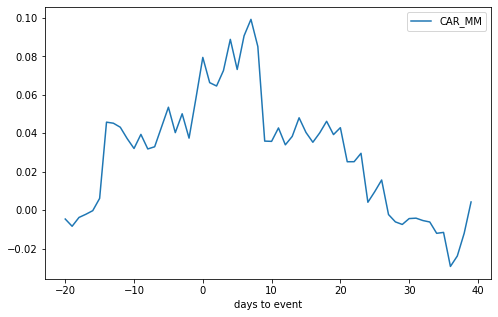

In [ ]:
returnsbhelfinal.plot(x='days to event', y='CAR_MM',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

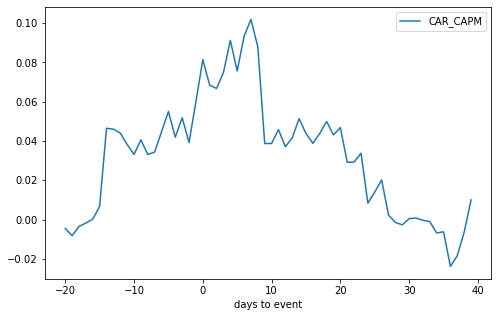

In [ ]:
returnsbhelfinal.plot(x='days to event', y='CAR_CAPM',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

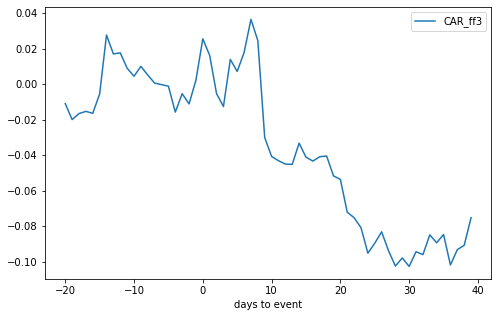

In [ ]:
returnsbhelfinal.plot(x='days to event', y='CAR_ff3',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

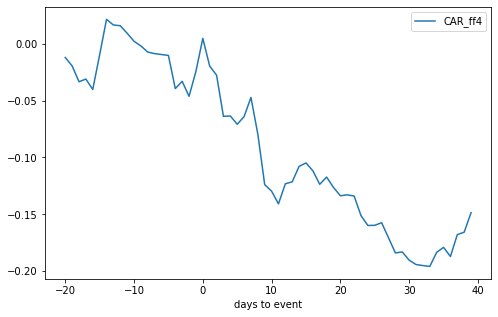

In [ ]:
returnsbhelfinal.plot(x='days to event', y='CAR_ff4',figsize=(8,5))

Final Conclusions (Interpretation of above Graphs)

For all the four models the figure suggests that the capital market percieves the event to be unfavourable for this security but they also show strong recovery as we see an upward trend followed by a downward trend within the event window
